**Buffon's Needle Assignment**

**Important - read carefully**

- Failure to follow instructions will lead to point penalties.

- You will need to execute the following cell to use this notebook. 

- You are **not** allowed to use any other packages in this assignment.

- When you are done with this assignment, evaluation of all cells should produce no errors.

- When asked to write a function, **use exactly the function name requested** and 
do not define any other function with the same name anywhere else in the notebook.

- When asked to make a **literal assignment** to a variable, you should 
    - use exactly the name of the variable requested on the left hand side
of the assignment
    - do **not** assign a value to that variable name anywhere else in the notebook
    - use **no functions, no variables, and no arithmetic operations on the right hand side (you can use a different cell to print out a number and then copy the number** to the right hand side of the assignment.
    - when asked for a literal floating point value in an assignment, for example
        - x = 67.5 **is** ok
        - x = "67.5" is **not** ok (that's a literal **string** assignment!)

In [39]:
import numpy as np

The purpose of this assignment is to give you some practise at coding functions in which various kinds of control flow constructs are needed. Monte Carlo simulation provides a framework relevant for many applications in which we need to simulate a system exhibiting stochasticity. In face, the first modern use of Monte Carlo simulation was developed by Stanslaw Ulam at Los Alamos National Laboratory as part of the Manhattan project (nuclear weapons development), but the applications are abundent and it has become an essential tool for applied mathematicians.

For an overview of the Monte Carlo method, see: https://en.wikipedia.org/wiki/Monte_Carlo_method

To illustrate how it works, we can focus for now on Buffon's needle problem. Here is a reference:
https://en.wikipedia.org/wiki/Buffon%27s_needle_problem

The idea is due to Georges-Louis Leclerc, Comte de Buffon a French mathematician who had some pretty wacky ideas, but the needle problem is a fun one. Imagine you have parallel lines in a plane all separated by the same distance $d$ (like the 5 yard lines in an American football field). 

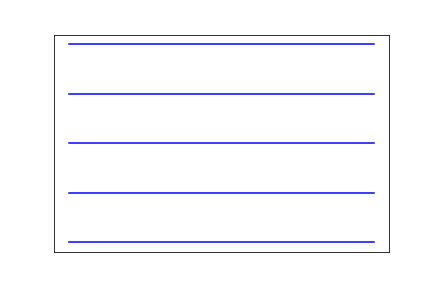

You have a needle whose length is 1 and you spin it around at random and drop it from some random position above the plane. Once it lands, you check whether it crosses one of the lines. 

To model this, the lines in our plane are the lines with integer $y$-coordinates. We'll assume needle has a non-pointy end whose $y$-coordinate (denoted by $Y$) is uniformly distributed between 0 and 1. Is it clear why we don't care about the $x$-coordinate? 
Then we'll spin the needle so that the angle $\Theta$  it makes with the horizontal axis is uniformly distributed between 0 and $2\pi.$

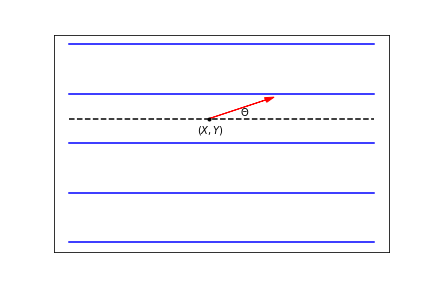

If we know the values of $Y$ and $\Theta$ we can tell whether the needle crosses a line. There are two cases to consider.

1) If $\Theta \in [0,\pi]$ then the needle is pointing in an upward (or horizontal) direction, and a line crossing occurs if the interval $[Y,Y + \sin(\Theta)]$ contains an integer.

2) If $\Theta \in [\pi,2\pi]$ then the needle is pointing in a downward (or horizontal) direction, and a line crossing occurs if the interval $[Y + \sin(\Theta),Y]$ contains an integer.

In either case, to decide whether a line crossing occurs, we just need to decide whether there is in integer between $Y$ and $Y+\sin(\Theta).$ 


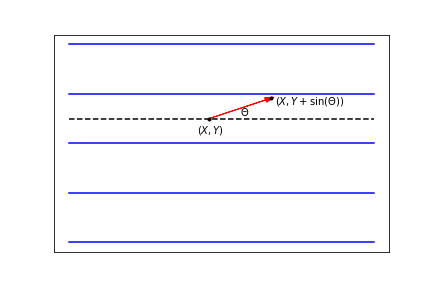

This is easy to check. The floor of a floating point number $r$ is defined to be the largest integer less than or equal to $r.$

In [40]:
import numpy as np
r=3.14159
print(np.floor(r))
r=-2.34134
print(np.floor(r))

3.0
-3.0


If the two numbers $Y$ and $Y+\sin(\Theta)$ have the same floor then either 

* they are the same integer (which happens with probability 0), or
* they both lie strictly between two integers, so a line-crossing does not occur

So here is a function to check a realization of $(Y,\Theta)$ for a line crossing.

In [41]:
import numpy as np
def check_line_crossing(Y,Theta):
    I1=np.floor(Y)
    I2=np.floor(Y+np.sin(Theta))
    if I1==I2:
        return False
    else:
        return True

Or more concisely

In [42]:
import numpy as np
def check_line_crossing(Y,Theta):
    return(np.floor(Y)!=np.floor(Y+np.sin(Theta)))

**Monte Carlo estimation of the probability**

Now the pieces are in place for estimating the probability. We repeatedly generate realizations and determine the proportion of them that produce a line crossing.

The resulting estimate $\hat{p}$ (the sample proportion) based on $n$ repeated trials 
has variance $p(1-p)/n$ so we can estimate the variance of our estimate by
$$
\sqrt{\hat{p}(1-\hat{p})/n}
$$

In [43]:
import numpy as np
ntrials=10000
ctr=0
for i in range(ntrials):
    #
    # Generate realization of a single uniform(0,1) random variable 
    # using numpy's random.uniform function
    #
    Y=np.random.uniform(0,1)
    #
    # Generate a realization of a single unifor(0,2*pi) random variable
    #
    Theta=np.random.uniform(0,2*np.pi)
    #
    # Check line crossing property for this realization
    #
    line_crossing=check_line_crossing(Y,Theta)
    #
    # Increment the line crossing count.
    # Note that Boolean is converted to 0/1.
    #
    ctr+=line_crossing
#
# Compute sample proportion of crossings
#
pest=ctr/ntrials
#
# Compute estimate of the variance of pest 
#
vest=pest*(1-pest)/ntrials
#
# And the standard deviation of our estimator
#
stderr=np.sqrt(vest)
#
# Get lower and upper 95% confidence intervals
#
CIlower=pest-1.96*stderr
CIupper=pest+1.96*stderr
print("probability estimate = {0:7.5f}".format(pest))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

probability estimate = 0.62850
standard error estimate = 0.00483
95% confidence interval = (0.61903,0.63797)


**Getting the probability analytically**

The exact value of the probability can be obtained using calculus (see the Wikipedia article) and is found to be $2/\pi.$

In [44]:
2/np.pi

0.6366197723675814

Of course, the point of the Monte Carlo method as a tool is to address estimation problems that are intractible.

**Estimation of an expected value**

Estimation of probabilities is a special case of a more general problem: estimation of an expected value. If $A$ is an event (e.g. line crossing occurs), then its probability $P[A]$ is $E[I_A],$ the expected value of the random variable $I_A$ that takes the value 0 if $A$ doesn't occur and 1 if $A$ occurs. 

Our Monte Carlo estimate of $P[A]$ this expected value based on $n$ trials is the proportion of times the event occurs in these trials. We can view each trial as producing a realization of the random variable $I_A$ (a zero or a 1) and our estimate is the average of these realizations.

More generally, if our experiment leads to realization of any random variable $X$ whose expected value $E[X]$ is finite, we can estimate $\mu = E[X]$ by averaging realizations of $X$ in repeated trials. In $n$ trials we obtain $X_0\ldots,X_{n-1}$ and our approximation to $\hat{\mu}$ can be taken to be $\overline{X} = \frac{1}{n} \sum_{i=0}^{n-1} X_i.$

We can estimate the standard deviation of $\hat{\mu}$ by $S/\sqrt{n}$ where 

$$S^2=\sum_{i=0}^{n-1} (X_i - \overline{X})^2/(n-1) = {\sum_{i=0}^{n-1} X_i^2 - n \overline{X}^2 \over n-1}
$$

the sample variance (so note that we can get this estimate by summing up the $X_i$ and the $X_i^2.$

The estimator $S/\sqrt{n}$ of the standard deviation of $\hat{\mu}$ is often referred to as the *standard error* of $\hat{\mu}.$

Then for a 95% confidence interval for $\mu$ we can use

$$
\overline{X} \pm 1.96 S/\sqrt{n}.
$$


**Example**

When we drop the needle, what is the expected value of the 
distance to the nearest line? (We take this to be zero if there is a line-crossing.)

To get an approximation, we average many realizations of these distances.

We need a function to calculate the distance. If there is not a line-crossing then the distance is the minimum of 
the distances from each endpoint from its nearest line. So the following function gives this distance.


In [45]:
def distance_to_nearest_line(Y,Theta):
    if check_line_crossing(Y,Theta):
        return(0.)
    d1=np.abs(Y-np.round(Y))
    d2=np.abs(Y+np.sin(Theta)-np.round(Y+np.sin(Theta)))
    return(min(d1,d2))

One we have a function that computes the value of our random variable in a single realization, the rest of our work is a straightforward modification of the code above for estimating an expected value and getting a confidence interval for it.

(Note that in addition to recording the sum of the realizations we record the sum of their squares to get our sample variance.)

In [46]:
import numpy as np
ntrials=10000
s=0
s2=0
for i in range(ntrials):
    # Generate realization 
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    d=distance_to_nearest_line(Y,Theta)
    # compute the sum of distances and sum of squared distances
    s+=d
    s2+=d**2
est=s/ntrials
vest=(s2-ntrials*est**2)/(ntrials-1)
stderr=np.sqrt(vest/ntrials)
CIlower=est-1.96*stderr
CIupper=est+1.96*stderr
print("expected value estimate = {0:7.5f}".format(est))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.05731
standard error estimate = 0.00104
95% confidence interval = (0.05528,0.05934)


**Exercises**

We've laid the groundwork for some exercises. In fact, the only thing that changes is

* code for generating a realization
* code for determining the random variable being averaged

Now we consider some examples where you do the work.

**Problem 1 (5 points)**

Suppose that the needle falls in such a way that the distribution of $Y$ has cdf $F(x)=x^2$ for $x \in (0,1).$ (The distribution of $\Theta$ should still be uniform in the interval $(0,2\pi)$ and $\Theta$ and $Y$ are still independent.)

Estimate the probability that the needle crosses a line and find a 95% confidence interval for that probability. Here a 95% confidence interval is of the form (lower bound,upper bound).

**Note:** You can use the inversion method to generate $Y$ having the required distribution.

Put your code in the cell below. You can print out numbers in this cell.

Make sure you do **not** assign values to the variables requested in the literal assignment cell.

You will be asked to summarize your results in the cell after the next one with **literal** assignments.

In [47]:
import numpy as np
ntrials=10000
s=0
s2=0
for i in range(ntrials):
    Y = 2*np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    d=check_line_crossing(Y,Theta)
    s+=d
    s2+=d**2
est=s/ntrials
vest=(s2-ntrials*est**2)/(ntrials-1)
stderr=np.sqrt(vest/ntrials)
CIlower=est-1.96*stderr
CIupper=est+1.96*stderr
print("expected value estimate = {0:7.5f}".format(est))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.63290
standard error estimate = 0.00482
95% confidence interval = (0.62345,0.64235)


In the following cell, assign a **literal floating point value** to each of the following:

- **problem1_pest** your estimated probability of a line crossing
- **problem1_std** your estimate of the standard deviation of problem1_pest
- **problem1_pest_lower** the lower bound
- **problem1_pest_upper** the upper bound

You can also use these variable names in the previous cell but when you do your assignments in the following cell, you should not have variable names or functions or arithmetic expressions on the right hand side.

In [48]:
problem1_pest=0.63290
problem1_std=0.00482
problem1_pest_lower=0.62345
problem1_pest_upper=0.64235

**Two Attached Needles**

As before, we have lines in the plane separated by 1 unit at $y=0,\pm 1,\pm2,\ldots$

A blue needle of length 1 is attached to a red needle of length 1 unit
separated by a perpendicular angle. Call the point where the needles are attached $Q.$

The point $Q$ ends up at random vertical distance $Y$ distributed Uniform(0,1) from the horizontal line closest to that point, with the blue needle pointing in a direction parallel to the $x$-axis as shown here:

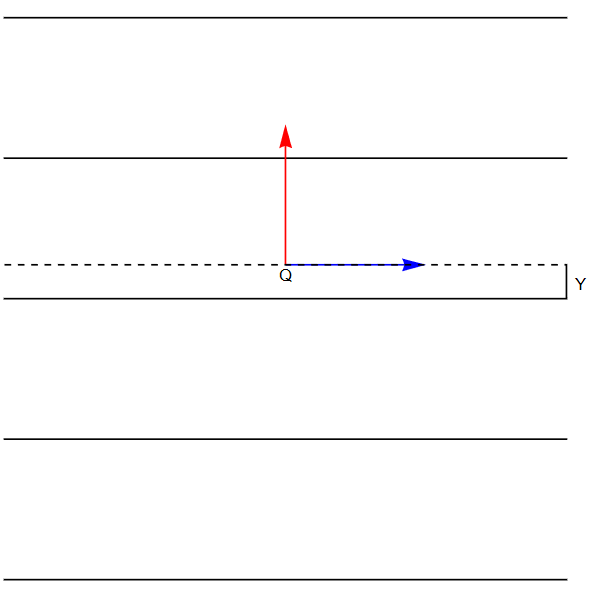


Then the combined needles spins a random angle $\Theta$ about $P$ where $\Theta$ is uniformly distributed in $[0,2\pi)$ as shown here:

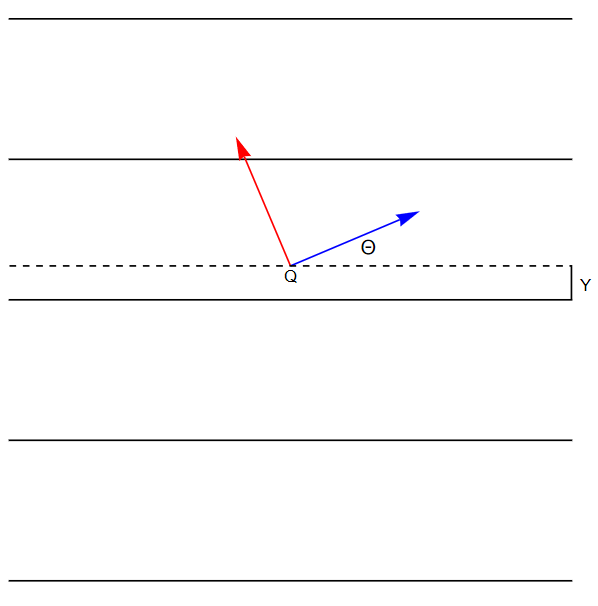

The angle of spin is taken to be independent of $Y.$

We want to estimate the probability that at least one of the needles crosses a line. 

**Problem 2 (5 points)**

Write a function called **check_line_crossing_2needles** that takes as inputs two arguments

- Y 
- $\Theta$ 

and outputs a Boolean value

- True, if at least one of the needles crosses a line, and 
- False otherwise.

Do not include any other code in the following cell.

In [49]:
import numpy as np

def check_line_crossing_2needles(Y,Theta):
    element=np.floor(Y)
    A=np.floor(Y+np.sin(Theta))
    B=np.floor(Y+np.cos(Theta))
    if element==A and element==B:
        return False
    else:
        return True

**Problem 3 (5 points)**

Use the function you defined in Problem 2 to estimate the probability that at least one of the needles crosses a line, and get a 95% confidence interval for this probability. 

Put your code in the next cell. In this cell you can print out the values of your estimates for the variables you are asked to assign literal values to in the subsequent cell.

Make sure you do **not** define a function named **check_line_crossing_2needles** in the following cell. 

Make sure you do **not** assign values to the variables requested in the literal assignment cell.

In [50]:
import numpy as np

# Func
def check_line_crossing_2needles(Y,Theta):
    element=np.floor(Y)
    A=np.floor(Y+np.sin(Theta))
    B=np.floor(Y+np.cos(Theta))
    if element==A and element==B:
        return False
    else:
        return True

# Cal
ntrials=10000
s=0
s2=0
for i in range(ntrials):
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    d=check_line_crossing_2needles(Y,Theta)
    s+=d
    s2+=d**2   
est=s/ntrials
vest=(s2-ntrials*est**2)/(ntrials-1)
stderr=np.sqrt(vest/ntrials)
CIlower=est-1.96*stderr
CIupper=est+1.96*stderr
print("expected value estimate = {0:7.5f}".format(est))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.95300
standard error estimate = 0.00212
95% confidence interval = (0.94885,0.95715)


In the following cell, assign a **literal floating point value** to each of the following:

- **problem3_pest** your estimated probability of a line crossing by at least one needle
- **problem3_std** your estimate of the standard deviation of problem1_pest
- **problem3_pest_lower** the lower bound
- **problem3_pest_upper** the upper bound


In [51]:
problem3_pest=0.95300
problem3_std=0.00212
problem3_pest_lower=0.94885
problem3_pest_upper=0.95715

**Problem 4 (5 points)**

When the two attached needles are dropped in the plane as described above, let 

- $B$ denote the event that the blue needle crosses a line
- $R$ denote the event that the red needle crosses a line

Give an estimate of the probability of $B\cap R.$ You do not have to give a confidence interval. 

**Note** - you can write Monte-Carlo code for this or you can use previous estimates of probabilities. 

Use the cell below to put any code you need. In the cell after that one you will be asked for a literal assignment.

Make sure you do **not** assign values to the variables requested in the literal assignment cell.

In [52]:
import numpy as np

# Func
def check_line_crossing_both2needles(Y,Theta):
    element=np.floor(Y)
    A=np.floor(Y+np.sin(Theta))
    B=np.floor(Y+np.cos(Theta))
    if element==A and element==B:
        return False
    else:
        return True

# Cal
ntrials=10000
s=0
s2=0
for i in range(ntrials):
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    d=check_line_crossing_both2needles(Y,Theta)
    s+=d
    s2+=d**2    
est=s/ntrials
vest=(s2-ntrials*est**2)/(ntrials-1)
stderr=np.sqrt(vest/ntrials)
CIlower=est-1.96*stderr
CIupper=est+1.96*stderr
print("expected value estimate = {0:7.5f}".format(est))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.95020
standard error estimate = 0.00218
95% confidence interval = (0.94594,0.95446)


In the following cell, assign your estimate to $P[B\cap R]$ to a variable called **probability_of_B_and_R**.

This should be a **literal** assignment.

In [53]:
probability_of_B_and_R=0.95020

**Problem 5 (5 points)**

When the two attached needles are dropped in the plane as described above, define $D$ to be the shortest distance from **any** point on any of the needles to a line. In the following cell, create a function called **shortest_distance_two_needles** that takes as input

- $Y$
- $\Theta$

and outputs

- $D$

In [54]:
def shortest_distance_two_needles(Y,Theta):
    if check_line_crossing_2needles(Y,Theta):
        return(0.)
    distance1=np.abs(Y-np.round(Y))
    distance2=np.abs(Y+np.sin(Theta)-np.round(Y+np.sin(Theta)))
    distance3=np.abs(Y+np.sin(Theta+0.5*np.pi)-np.round(Y+np.sin(Theta+0.5*np.pi)))
    return(min(distance1,distance2,distance3))
print(shortest_distance_two_needles(0.2,0.25*np.pi))

0.09289321881345236


**Problem 6 (5 points)**

Estimate $\mu = E[D]$ where $D$ is defined above, compute an estimate of the standard deviation of your estimate $\hat{\mu}$ and give a 95% confidence interval for $\mu.$ 

Use the following cell for your calculations. 

In the cell after the next one you will be asked for literal assignments.

Make sure you do **not** define a function called **shortest_distance_two_needles** in the following cell.

Make sure you do **not** assign values to the variables requested in the literal assignment cell.

In [55]:
import numpy as np

# Cal
ntrials=10000
s=0
s2=0
for i in range(ntrials):
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    d=shortest_distance_two_needles(Y,Theta)
    s+=d
    s2+=d**2   
est=s/ntrials
vest=(s2-ntrials*est**2)/(ntrials-1)
stderr=np.sqrt(vest/ntrials)
CIlower=est-1.96*stderr
CIupper=est+1.96*stderr
print("expected value estimate = {0:7.5f}".format(est))
print("standard error estimate = {0:7.5f}".format(stderr))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.00210
standard error estimate = 0.00012
95% confidence interval = (0.00186,0.00233)


Assign **literal floating point values** to variables

- **problem6_muhat** your estimate of $\mu$
- **problem6_std** your estimate of the standard deviation of $\hat{\mu}$
- **problem6_lower** your lower bound 
- **problem6_upper** your upper bound 




In [56]:
problem6_muhat = 0.00210
problem6_std = 0.00012
problem6_lower = 0.00186
problem6_upper = 0.00233

**Problem 7 (5 points)**

For these final problems we go back to the single needle situation when $Y \sim \mbox{Uniform}(0,1)$ and $\Theta \sim \mbox{Uniform}(0,2\pi)$ with $Y$ and $\Theta$ independent.

Let $C$ denote the event that a crossing occurs and let $T$ denote the event that $Y>.5.$

We want to estimate the conditional probability of $T$ given $C$ 

$$P[ T \vert C] = P[T \cap C]/P[C].$$


Equivalently, this is the long-run proportion of times that $T$ occurs when we restrict attention ony to trials in which $C$ occurs.

So we can estimate this probability by 

- generating a large number of trials
- determining the proportion $p_{T\cap C}$ of times $T \cap C$ occurs
- determining the proportion $p_C$ of times $C$ occurs

taking as an estimate 

$$ \frac{p_{T\cap C}}{p_C}$$

Equivalently, we generate many trials and restrict attention only to those cases in which a crossing occurs, and determine the sample proportion of **those** cases  in which $Y$ occurs.

In the following cell, compute an estimate of the conditional probability. (You do not have to provide any other information.)

In the cell after the next one you will be asked to make a literal assignment. 

Do **not** assign a value to a variable with the same name in the following cell.

In [57]:
import numpy as np

# Cal
ntrials=10000
ctr_t_c=0
ctr_c=0    
for i in range(ntrials):
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    line_crossing=check_line_crossing(Y,Theta)
    ctr_c+=line_crossing
    if Y>0.5:
        ctr_t_c+=line_crossing
print("expected conditional probability = {0:7.5f}".format(ctr_t_c/ctr_c))

expected conditional probability = 0.49004


In the following cell, assign a literal floating point value to a variable called **conditional_probability**

In [58]:
conditional_probability=0.49004

**Problem 8 (5 points)**

We want to estimate the conditional expected value of $\Theta$ given that a crossing occurs. Symbolically, this can be written as 

$$ E[\Theta \vert C]$$

where $C$ is the event that a crossing occurs.

You can think of this as the long-run average of $\Theta$ among trials in which the crossing event occurs. So we can estimate this by 

- sampling values of $Y$ and $\Theta$ repeatedly
- only look at trials in which a crossing occurs
- for those trials we average the $\Theta$ values.

Estimate this conditional expected value.

Use the following cell for your code.

Do **not** assign a value to the variable **conditional_expected_value** in the following cell. 

In [59]:
import numpy as np

# Cal
ntrials=10000
sum_c=0
sum_theta=0    
for i in range(ntrials):
    Y=np.random.uniform(0,1)
    Theta=np.random.uniform(0,2*np.pi)
    if check_line_crossing(Y,Theta):
        sum_c+=1
        sum_theta+=Theta
print("expected conditional expected value = {0:7.5f}".format(sum_theta/sum_c))

expected conditional expected value = 3.15158


In the following cell, assign a literal floating point value to **conditional_expected_value**

In [60]:
conditional_expected_value=3.15158

**When you are done with the assignment save your notebook <u>after</u> running all cells.**

**Then submit your saved notebook.**